# Introducing Scikit-Learn

## Data Representation in Scikit-Learn

### Data as table

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


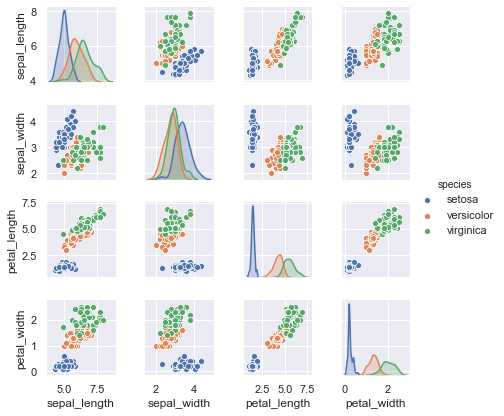

In [116]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height = 1.5);

## Scikit-Learn's Estimator API

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

### Supervised learning example: Simple linear regression

In [122]:
from sklearn.linear_model import LogisticRegression #1. Choose a class of model

logreg = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs') #2. Specify model hyperparameters

X_iris = iris.drop('species', axis=1) #3. Arrange data into a features matrix and target vector
y_iris = iris['species']

logreg.fit(X_iris, y_iris) #4. Fit the model to your data
print("model's coefficients are", logreg.coef_, logreg.intercept_)

yfit = logreg.predict(X_iris) #5. Predict labels for unknown data

model's coefficients are [[  3.93484917   9.17705804 -12.37477381  -5.92901714]
 [ -0.73506801  -1.25184702   1.47692207  -6.16893673]
 [ -3.19978115  -7.92521103  10.89785174  12.09795387]] [  2.15275651  20.21775615 -22.37051265]


### Supervised learning example: Iris classification

In [58]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, train_size = 0.80,
                                                random_state=1) # the default ratio is .75 vs .25

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model).round(2)

### Unsupervised learning example: Iris dimensionality

In [75]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering

In [69]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
                covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

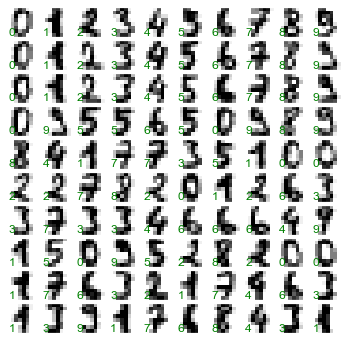

In [109]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

### Unsupervised learning: Dimensionality reduction

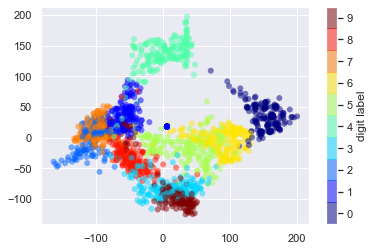

In [107]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

accuracy score is  0.8333


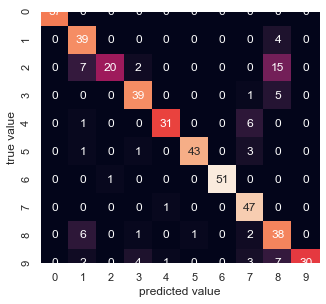

In [106]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print('accuracy score is ', accuracy_score(ytest, y_model).round(4))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

fig, ax = plt.subplots(figsize=(5,5))    
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value'); # the top bottom row has been cutoff, this is bug for sns 3.1

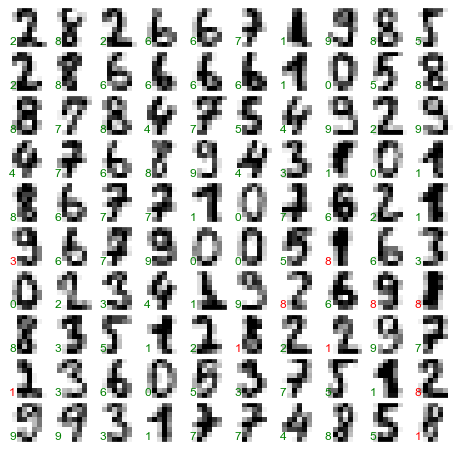

In [105]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')